In [11]:
import pandas as pd
df=pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [14]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [15]:
df.shape

(53940, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [17]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['clarity']=le.fit_transform(df['clarity'])
df['cut']=le.fit_transform(df['cut'])
df['color']=le.fit_transform(df['color'])
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


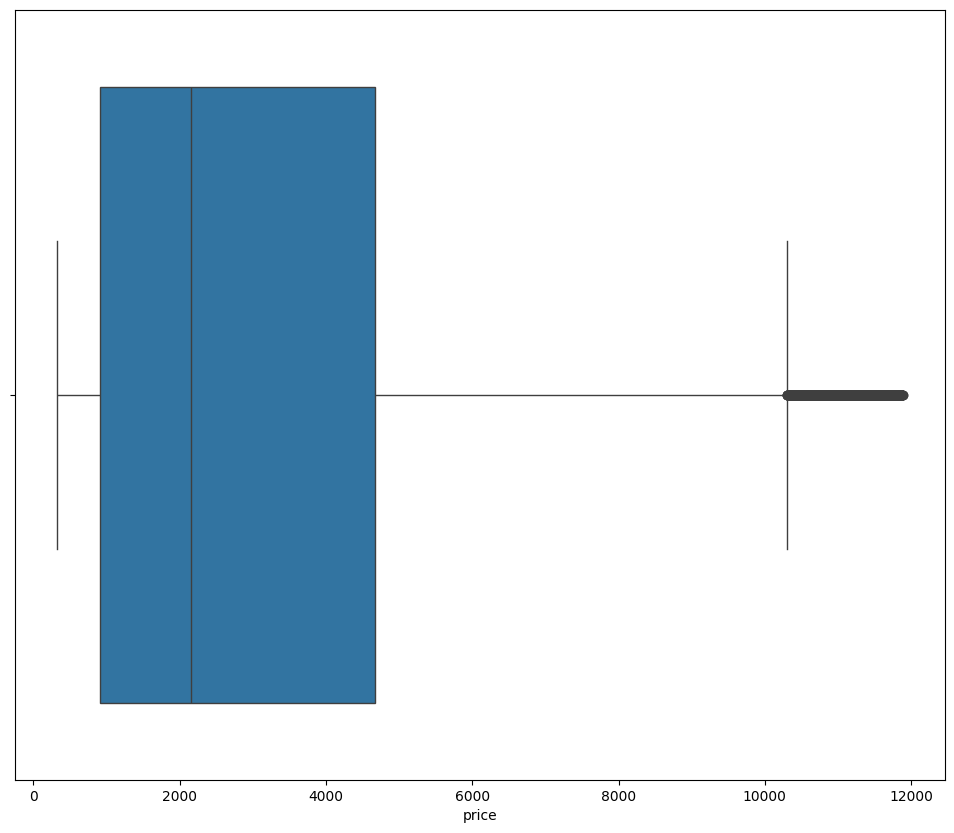

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.boxplot(x=df['price'])
plt.show()

In [28]:
Q3=df['price'].quantile(0.75)
Q1=df['price'].quantile(0.25)
IQR=Q3-Q1
print(IQR)

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print(upper)
print(lower)

df=df[~((df['price']>=(Q1-1.5*IQR))&(df['price']<=(Q3+1.5*IQR)))]


3758.0
10306.0
-4726.0


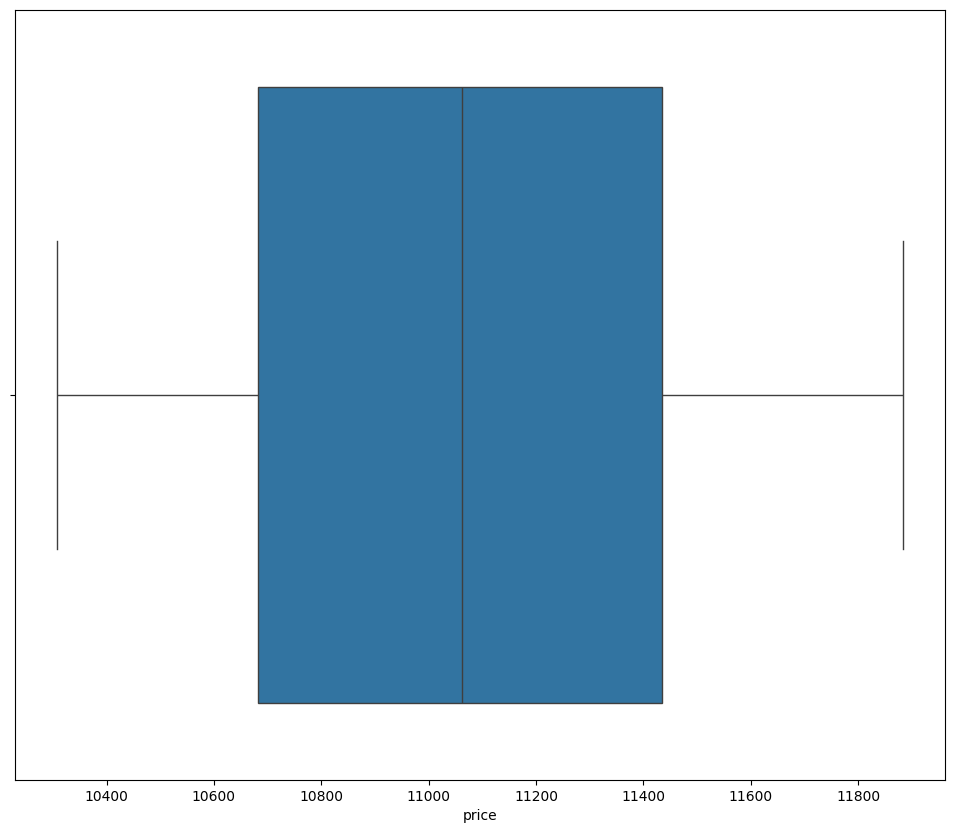

In [35]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['price'])
plt.show()

In [36]:
x=df.drop(['price'],axis=1)
y=df['price']
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
22252,22253,1.52,3,0,3,61.4,54.0,10308,7.51,7.43,4.59
22253,22254,1.18,2,3,7,61.3,55.0,10308,6.86,6.81,4.19
22254,22255,1.59,4,5,5,61.1,58.6,10309,7.49,7.53,4.59
22255,22256,1.71,2,6,4,62.4,56.0,10309,7.59,7.63,4.75
22256,22257,1.40,2,3,5,61.7,56.0,10311,7.20,7.25,4.46
...,...,...,...,...,...,...,...,...,...,...,...
23815,23816,1.50,3,2,2,62.9,59.0,11878,7.34,7.29,4.60
23816,23817,1.50,4,5,4,63.3,54.0,11879,7.26,7.33,4.62
23817,23818,1.22,2,2,7,62.7,54.0,11880,6.79,6.84,4.27
23818,23819,1.20,2,1,7,61.5,57.0,11883,6.79,6.89,4.21


In [37]:
x

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
22252,22253,1.52,3,0,3,61.4,54.0,7.51,7.43,4.59
22253,22254,1.18,2,3,7,61.3,55.0,6.86,6.81,4.19
22254,22255,1.59,4,5,5,61.1,58.6,7.49,7.53,4.59
22255,22256,1.71,2,6,4,62.4,56.0,7.59,7.63,4.75
22256,22257,1.40,2,3,5,61.7,56.0,7.20,7.25,4.46
...,...,...,...,...,...,...,...,...,...,...
23815,23816,1.50,3,2,2,62.9,59.0,7.34,7.29,4.60
23816,23817,1.50,4,5,4,63.3,54.0,7.26,7.33,4.62
23817,23818,1.22,2,2,7,62.7,54.0,6.79,6.84,4.27
23818,23819,1.20,2,1,7,61.5,57.0,6.79,6.89,4.21


In [38]:
y

22252    10308
22253    10308
22254    10309
22255    10309
22256    10311
         ...  
23815    11878
23816    11879
23817    11880
23818    11883
23819    11883
Name: price, Length: 1388, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[-1.7177105 ,  0.01911728,  0.36899222, ...,  0.36416801,
         0.20947623,  0.23544712],
       [-1.71549837, -1.1086108 , -0.65328564, ..., -1.00337572,
        -1.13901918, -1.10376241],
       [-1.71328625,  0.25129659,  1.39127009, ...,  0.32208975,
         0.42697549,  0.23544712],
       ...,
       [ 1.74426878, -0.97593691, -0.65328564, ..., -1.15064966,
        -1.07376941, -0.8359205 ],
       [ 1.74648091, -1.04227385, -0.65328564, ..., -1.15064966,
        -0.96501978, -1.03680193],
       [ 1.74869303,  1.04733993,  0.36899222, ...,  1.18469425,
         0.97072365,  1.37377523]], shape=(1388, 10))

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[10297.00247405 10318.65311922 10617.69993254 10462.03361615
 11000.34849343 11103.55422147 11078.27616897 10762.13500858
 10902.7342648  10811.67030619 10541.64536498 11610.57794268
 11342.14150774 11704.10247496 10427.14209753 11026.11590066
 11616.69506989 11570.75427754 10958.2407402  11621.84395339
 11138.84754628 11678.22826672 11562.89046083 11775.5992558
 11328.1272079  11109.82557221 10446.06983817 10761.79519054
 10793.71580136 10315.22105313 10493.22441733 11137.1706344
 10786.54904029 10580.40901696 10926.97912972 11183.68886022
 11753.60236451 10621.51156118 10541.68036386 10535.73494877
 10347.86593992 10773.35908539 10561.1512962  11623.72248586
 11457.18672134 10445.1910419  10881.68250105 10827.59282055
 11686.41026944 10589.23938696 11337.88464675 11267.15443472
 11178.63331636 10306.79299765 11336.63260668 10622.81907423
 10837.40233291 11583.03696124 10443.69500796 10900.30353314
 10690.88878025 11755.27841549 10363.04304176 11760.44693752
 11238.56613052 10892.2161

In [41]:
from sklearn.metrics import r2_score
r2s=r2_score(y_test,y_pred)
print(r2s)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.9986020463878631
13.73925729295161


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
model=LinearRegression()
model.fit(x_test,y_test)
pred = model.predict(x_test)
print(y_pred)

[10297.00247405 10318.65311922 10617.69993254 10462.03361615
 11000.34849343 11103.55422147 11078.27616897 10762.13500858
 10902.7342648  10811.67030619 10541.64536498 11610.57794268
 11342.14150774 11704.10247496 10427.14209753 11026.11590066
 11616.69506989 11570.75427754 10958.2407402  11621.84395339
 11138.84754628 11678.22826672 11562.89046083 11775.5992558
 11328.1272079  11109.82557221 10446.06983817 10761.79519054
 10793.71580136 10315.22105313 10493.22441733 11137.1706344
 10786.54904029 10580.40901696 10926.97912972 11183.68886022
 11753.60236451 10621.51156118 10541.68036386 10535.73494877
 10347.86593992 10773.35908539 10561.1512962  11623.72248586
 11457.18672134 10445.1910419  10881.68250105 10827.59282055
 11686.41026944 10589.23938696 11337.88464675 11267.15443472
 11178.63331636 10306.79299765 11336.63260668 10622.81907423
 10837.40233291 11583.03696124 10443.69500796 10900.30353314
 10690.88878025 11755.27841549 10363.04304176 11760.44693752
 11238.56613052 10892.2161

In [43]:
from sklearn.metrics import r2_score
r2s=r2_score(y_test,y_pred)
print(r2s)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.9986020463878631
13.73925729295161
